In [1]:
# loading data
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir="C:/Users/igloo/Documents/deep learning projects/street/data"

In [5]:
image_exts=["jpeg", "jpg","bmp","png"]

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}". format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image{}".format(image_path))

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data=tf.keras.utils.image_dataset_from_directory("data")

Found 684 files belonging to 3 classes.


In [9]:
data_iterator=data.as_numpy_iterator()

In [10]:
data_iterator

In [11]:
batch=data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch[1].shape

(32,)

In [14]:
batch[0]

array([[[[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        [[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        [[255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         ...,
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ],
         [255.       , 255.       , 255.       ]],

        ...,

        [[255.       , 255.       , 25

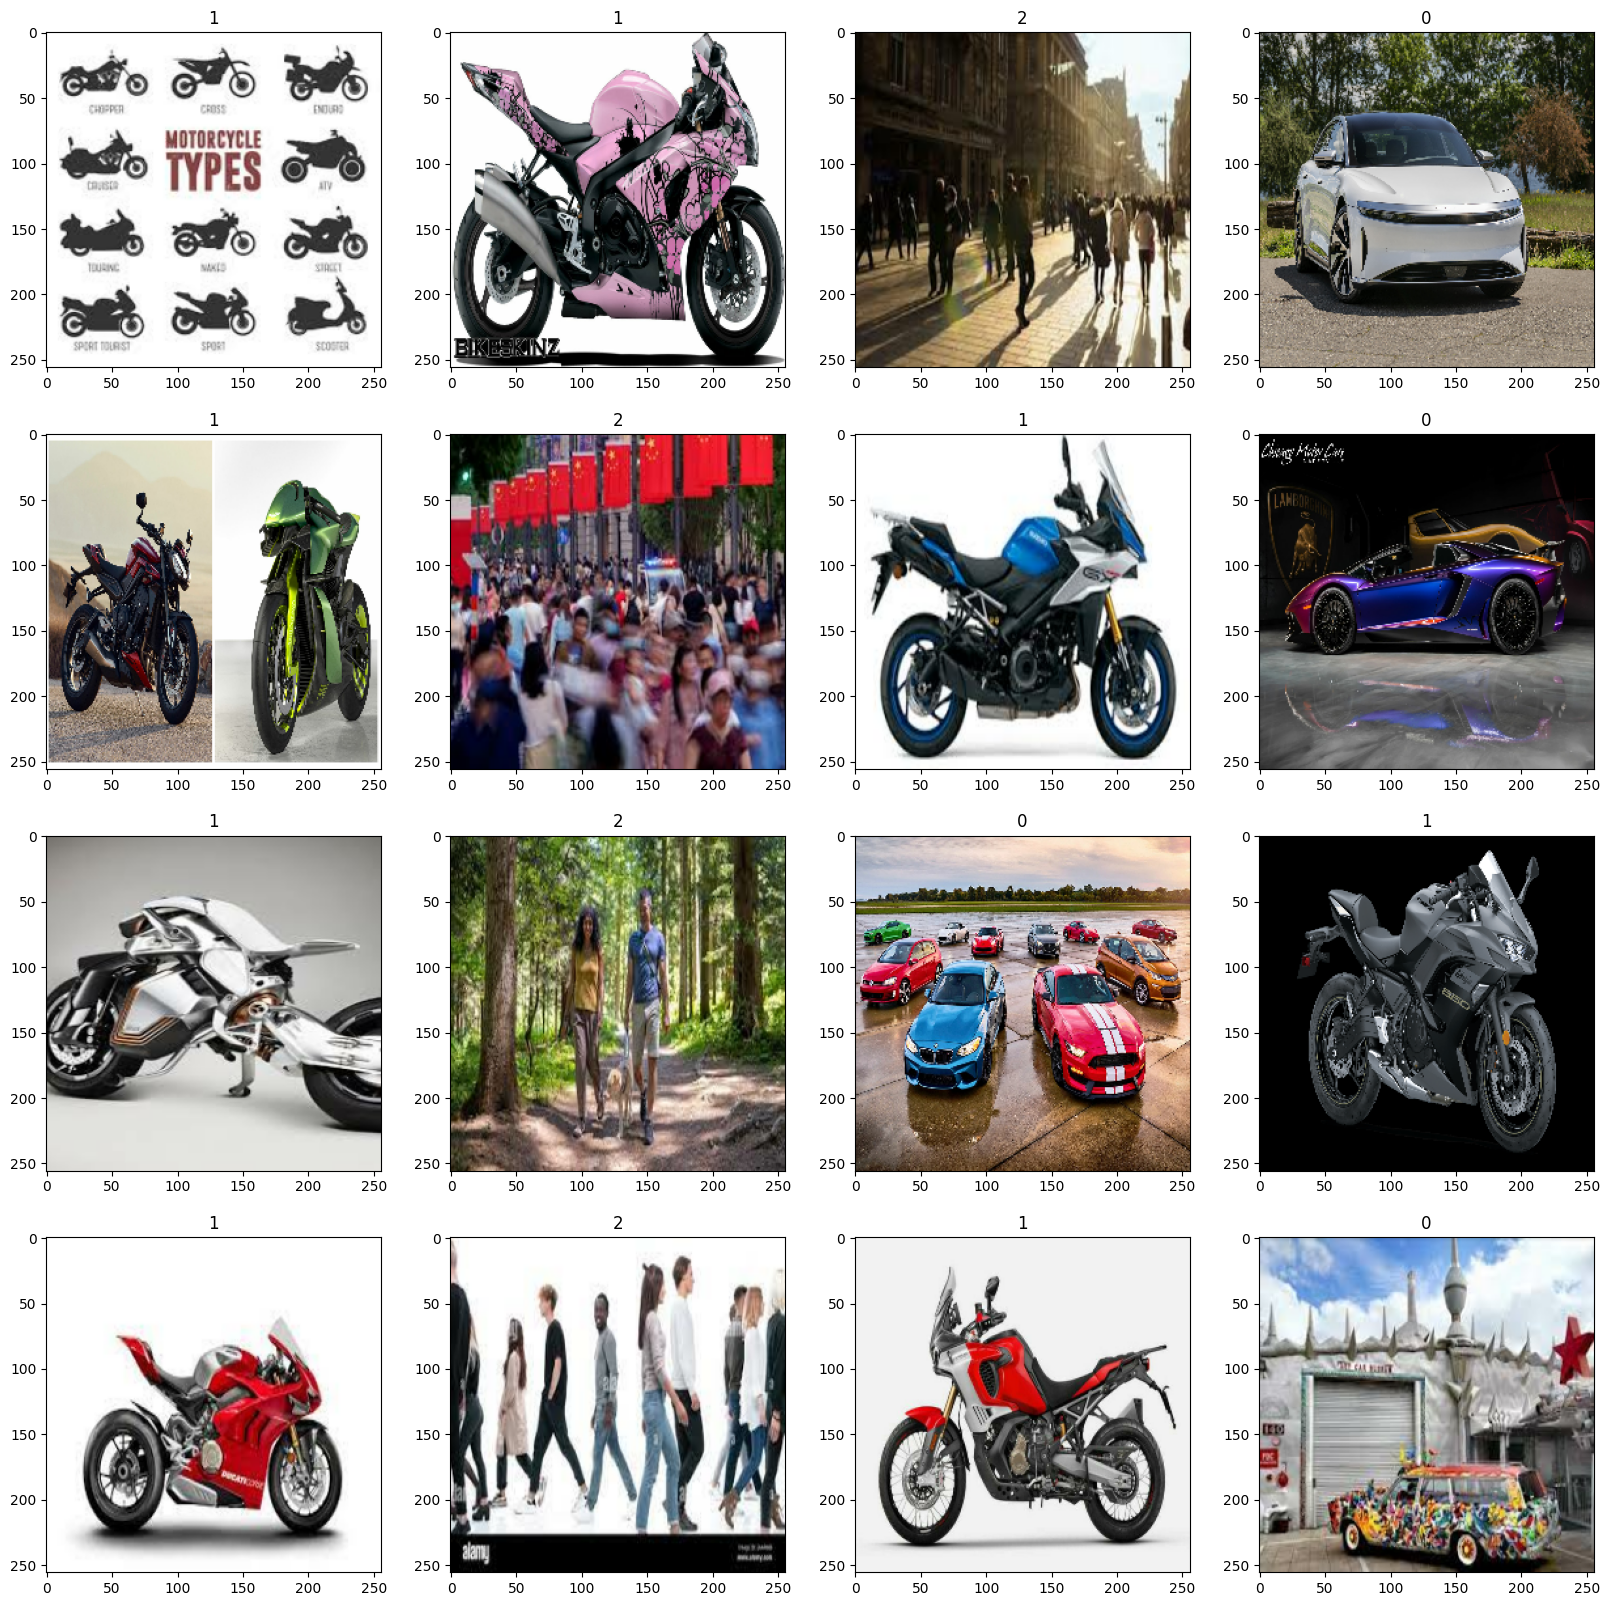

In [15]:
fig, axs=plt.subplots(ncols=4,nrows=4, figsize=(20,20))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier indexing
for idx, img in enumerate(batch[0][:16]):
    axs[idx].imshow(img.astype(int))
    axs[idx].title.set_text(batch[1][idx])

In [16]:
scaled=batch[0]/255

In [17]:
scaled.max()

1.0

In [18]:
scaled.min()

0.0

In [19]:
data= data.map(lambda x, y:(x/255,y))

In [20]:
scaled_iterator=data.as_numpy_iterator().next()

In [21]:
scaled_iterator

(array([[[[0.2517157 , 0.27916667, 0.01568628],
          [0.26715687, 0.29534313, 0.01568628],
          [0.29362744, 0.327451  , 0.01446078],
          ...,
          [0.07132353, 0.1495098 , 0.        ],
          [0.09142157, 0.15637255, 0.        ],
          [0.1495098 , 0.2122549 , 0.02941176]],
 
         [[0.2517157 , 0.27916667, 0.01568628],
          [0.26715687, 0.29534313, 0.01568628],
          [0.29362744, 0.327451  , 0.01446078],
          ...,
          [0.05999158, 0.13817784, 0.        ],
          [0.08858858, 0.15353955, 0.        ],
          [0.1416547 , 0.2043998 , 0.02168543]],
 
         [[0.24848872, 0.27599093, 0.01240809],
          [0.2648519 , 0.29385772, 0.01256175],
          [0.29224446, 0.32663143, 0.01251436],
          ...,
          [0.05241843, 0.12978515, 0.        ],
          [0.09376388, 0.15789531, 0.00399529],
          [0.13891266, 0.20160654, 0.02039149]],
 
         ...,
 
         [[0.60365397, 0.5409089 , 0.4507128 ],
          [0.60317

In [22]:
# split data
len(data)

22

In [23]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [24]:
train_size

15

In [25]:
val_size

4

In [26]:
test_size

3

In [73]:
train= data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [75]:
model= Sequential()

In [76]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [77]:

model.compile("adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [79]:
# train
logdir="logs"

In [80]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [81]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 3s 142ms/step - loss: 1.0494 - accuracy: 0.4542 - val_loss: 0.8465 - val_accuracy: 0.6797
Epoch 2/20
15/15 [==============================] - 3s 145ms/step - loss: 0.7007 - accuracy: 0.7146 - val_loss: 0.5424 - val_accuracy: 0.7500
Epoch 3/20
15/15 [==============================] - 3s 149ms/step - loss: 0.4677 - accuracy: 0.8021 - val_loss: 0.2743 - val_accuracy: 0.9062
Epoch 4/20
15/15 [==============================] - 3s 151ms/step - loss: 0.2817 - accuracy: 0.9187 - val_loss: 0.2273 - val_accuracy: 0.9141
Epoch 5/20
15/15 [==============================] - 3s 145ms/step - loss: 0.1688 - accuracy: 0.9542 - val_loss: 0.1253 - val_accuracy: 0.9531
Epoch 6/20
15/15 [==============================] - 3s 145ms/step - loss: 0.0721 - accuracy: 0.9917 - val_loss: 0.1511 - val_accuracy: 0.9766
Epoch 7/20
15/15 [==============================] - 3s 150ms/step - loss: 0.0643 - accuracy: 0.9812 - val_loss: 0.1349 - val_accuracy: 0.9766
Epoch 

In [82]:
hist.history

{'loss': [1.0493665933609009,
  0.7007161378860474,
  0.4677245318889618,
  0.28169915080070496,
  0.16875268518924713,
  0.07206444442272186,
  0.06431075185537338,
  0.025091202929615974,
  0.03331322968006134,
  0.03664414584636688,
  0.019142519682645798,
  0.01214407104998827,
  0.006699615158140659,
  0.0020629006903618574,
  0.0053215003572404385,
  0.007017514668405056,
  0.0031096104066818953,
  0.0010909833945333958,
  0.0006450561922974885,
  0.0005570948123931885],
 'accuracy': [0.4541666805744171,
  0.7145833373069763,
  0.8020833134651184,
  0.918749988079071,
  0.9541666507720947,
  0.9916666746139526,
  0.981249988079071,
  0.9958333373069763,
  0.9958333373069763,
  0.9937499761581421,
  0.9979166388511658,
  1.0,
  0.9979166388511658,
  1.0,
  0.9979166388511658,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.846532940864563,
  0.5424121022224426,
  0.2743240296840668,
  0.22731536626815796,
  0.1253054141998291,
  0.1510518193244934,
  0.13489513099193573,
  0.1

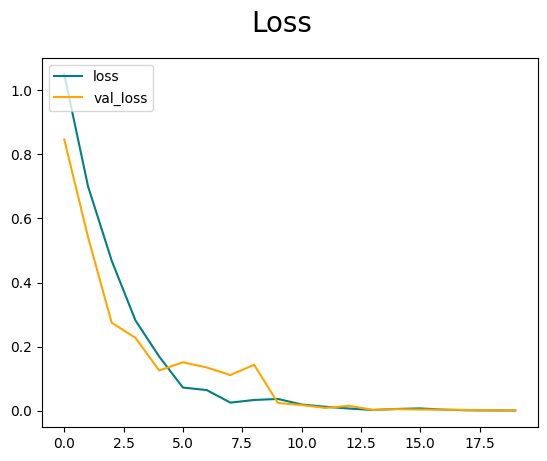

In [83]:
fig=plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"],color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

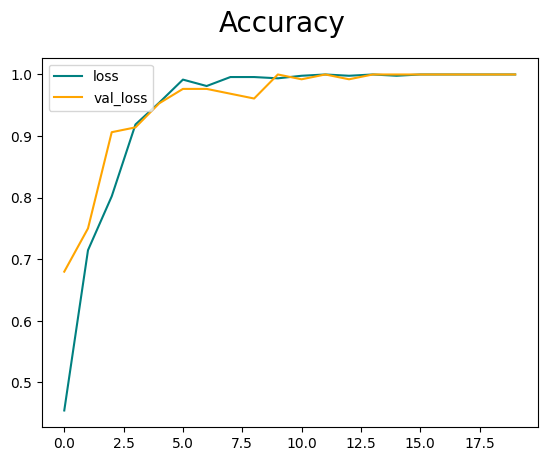

In [84]:
fig=plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="loss")
plt.plot(hist.history["val_accuracy"],color="orange", label="val_loss")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
# evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
pre= Precision()
re= Recall()
acc=BinaryAccuracy()

In [87]:
len(test)

3

In [99]:
for batch in test.as_numpy_iterator():
    X, y= batch
    yhat=model.predict(X)
    yhat = tf.argmax(yhat, axis=1)  # Convert predictions to class labels
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 36ms/step


AttributeError: 'list' object has no attribute 'update_state'

In [89]:
y

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2])

In [90]:
yhat

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2], dtype=int64)>

In [91]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0,Accuracy:0.6184210777282715


In [98]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Precision, Recall
num_classes=3
# Initialize the metrics for each class
acc = SparseCategoricalAccuracy()
pre = [Precision(class_id=i) for i in range(num_classes)]
re = [Recall(class_id=i) for i in range(num_classes)]

# Reset the metrics at the start
acc.reset_states()
for p, r in zip(pre, re):
    p.reset_states()
    r.reset_states()

# Evaluate the model on the test set
for batch in test:
    X, y = batch
    yhat = model.predict(X)
    yhat = tf.argmax(yhat, axis=1)  # Convert predictions to class labels

    acc.update_state(y, yhat)
    for p, r in zip(pre, re):
        p.update_state(y, yhat)
        r.update_state(y, yhat)

# Print the results
print(f'Accuracy: {acc.result().numpy()}')
for i in range(num_classes):
    print(f'Class {i} - Precision: {pre[i].result().numpy()}, Recall: {re[i].result().numpy()}')


1/1 [==============================] - 0s 51ms/step


InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:GPU:0}} Can not squeeze dim[0], expected a dimension of 1, got 32 [Op:Squeeze]

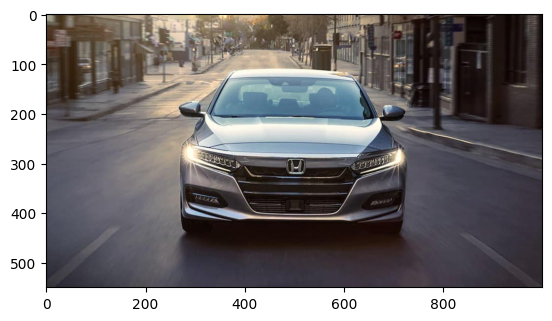

In [92]:
#testg
img=cv2.imread("C:/Users/igloo/Documents/deep learning projects/street/test/car.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

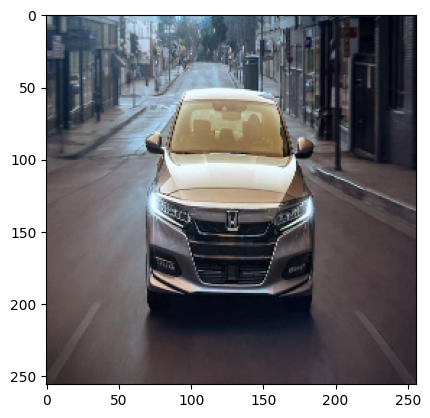

In [93]:
resize=tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
yhat=model.predict(np.expand_dims(resize/256,0))

1/1 [==============================] - 0s 19ms/step


In [95]:
yhat

array([[5.2440262e-01, 4.7557604e-01, 2.1327785e-05]], dtype=float32)

In [96]:
predicted_class = tf.argmax(yhat, axis=1).numpy()
predicted_class

array([0], dtype=int64)